In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('coaster_db.csv')

In [3]:
pd.set_option('display.max_columns', 200)
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
# drop null values in the Length column and show first few rows
df = df.dropna(subset=['Length'])
# Extract Length in feet from the Length column
df['Length_feet'] = df['Length'].str.split('ft').str[0].str.strip()\
    .str.split('(').str[-1].str.strip()\
        .str.replace(',', '').str.split('or').str[0].str.strip()\
            .str.split('–').str[0]\
                .str.split('[').str[0].astype(float)
df.head()


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Length_feet
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9,600.0
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN,1452.0
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing,72.5 ft (22.1 m),0.0,Chain lift,"$75,000",4 trains with 4 cars. Riders are arranged 2 ac...,NaN,1:32,1400 riders per hour,NaN,John A. Miller,NaN,50 ft (15 m),NaN,NaN,NaN,Möbius Loop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910,40.3869,-79.8619,Wood,1927-01-01,40 mph,64 km/h,40.0,mph,40.0,72.5,ft,NaN,0,NaN,4500.0
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),NaN,16 m (52 ft),0.0,Cable lift hill,NaN,3 trains with 2 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,Wood,1912-12-01,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,52.5,0,NaN,3173.0
16,Zippin Pippin,"2,865 ft (873 m)",40 mph (64 km/h),Other,NaN,NaN,Wood,The Gravity Group,48 in (122 cm),Wooden Coaster,70 ft (21 m),NaN,Chain lift hill,NaN,NaN,NaN,1:58,NaN,NaN,John A. Miller,64°,70 ft (21 m),NaN,NaN,NaN,Martin & Vleminckx,NaN,NaN,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,Wood,NaN,40 mph,64 km/h,40.0,mph,40.0,70.0,ft,NaN,0,NaN,2865.0


In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean', 'Length_feet'],
      dtype='object')

In [6]:
df = df[['coaster_name',
    #'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'Length_feet',
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,Length_feet,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,600.0,NaN,0,2.9
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,1452.0,NaN,0,NaN
13,Racer (1910 roller coaster),Kennywood,Operating,Charlie Mach,1910,40.3869,-79.8619,Wood,1927-01-01,40.0,4500.0,NaN,0,NaN
15,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.3,3173.0,52.5,0,NaN
16,Zippin Pippin,Other,NaN,The Gravity Group,1912,NaN,NaN,Wood,NaN,40.0,2865.0,NaN,0,NaN


In [8]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [9]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             183
Manufacturer        21
Year_Introduced      0
latitude           232
longitude          232
Type_Main            0
Opening_Date       190
Speed_mph           53
Length_feet          0
Height_ft          785
Inversions           0
Gforce             600
dtype: int64

In [10]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()
df.shape

(867, 14)

In [11]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft', 'Length_feet','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Length_feet,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.015958,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,0.702855,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,0.626666,-0.079736,0.466482
Length_feet,-0.015958,0.702855,0.626666,1.000000,0.044129,0.346613
Inversions,-0.209887,-0.028705,-0.079736,0.044129,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.346613,0.275991,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Coaster Features')

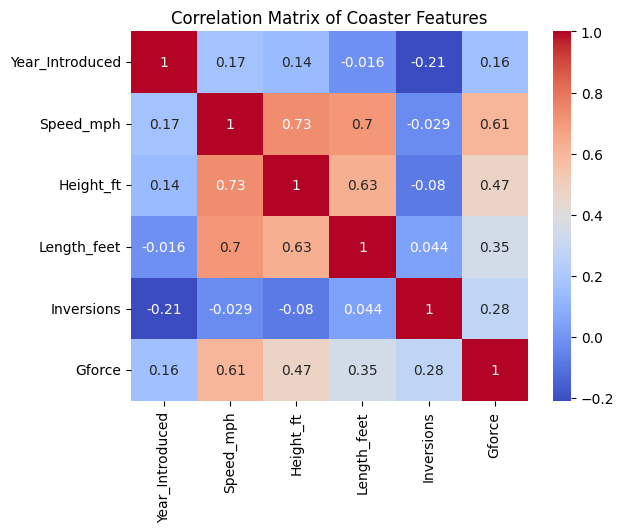

In [12]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Coaster Features')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_model = df[['Length_feet','Speed_mph']].dropna()
X = df_model[['Length_feet']]
y = df_model['Speed_mph']

# Train multiple models to find the best R2 and save it
# import pickle
# best_r2 = 0
# for x in range(200):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = model.score(X_test, y_test)
#     if r2 > best_r2:
#         best_r2 = r2
#         print(f'New best R2: {best_r2}')
#         with open('best_model_length_speed.pkl', 'wb') as f:
#             pickle.dump(model, f)

# Load the best model saved
import pickle
with open('best_model_length_speed.pkl', 'rb') as f:
    model = pickle.load(f)
# Predict missing Speed_mph values
df_missing_speed = df[df['Speed_mph'].isna() & df['Length_feet'].notna()] 
X_missing = df_missing_speed[['Length_feet']]
predicted_speeds = model.predict(X_missing)
df.loc[df_missing_speed.index, 'Speed_mph'] = predicted_speeds
df.head()


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Length_feet,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,600.0,NaN,0,2.9
1,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,1452.0,NaN,0,NaN
2,Racer (1910 roller coaster),Kennywood,Operating,Charlie Mach,1910,40.3869,-79.8619,Wood,1927-01-01,40.0,4500.0,NaN,0,NaN
3,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.3,3173.0,52.5,0,NaN
4,Zippin Pippin,Other,NaN,The Gravity Group,1912,NaN,NaN,Wood,NaT,40.0,2865.0,NaN,0,NaN


In [14]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             121
Manufacturer        20
Year_Introduced      0
latitude           172
longitude          172
Type_Main            0
Opening_Date       129
Speed_mph            0
Length_feet          0
Height_ft          711
Inversions           0
Gforce             551
dtype: int64

<Axes: >

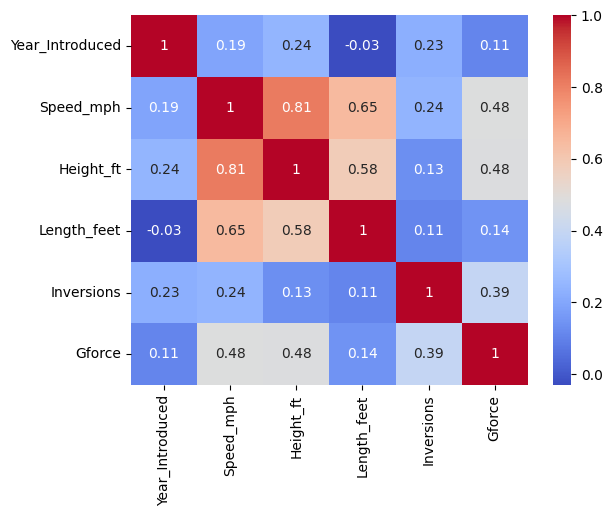

In [15]:
sns.heatmap(df[['Year_Introduced','Speed_mph',
    'Height_ft', 'Length_feet','Inversions','Gforce']].corr(), annot=True, cmap='coolwarm')


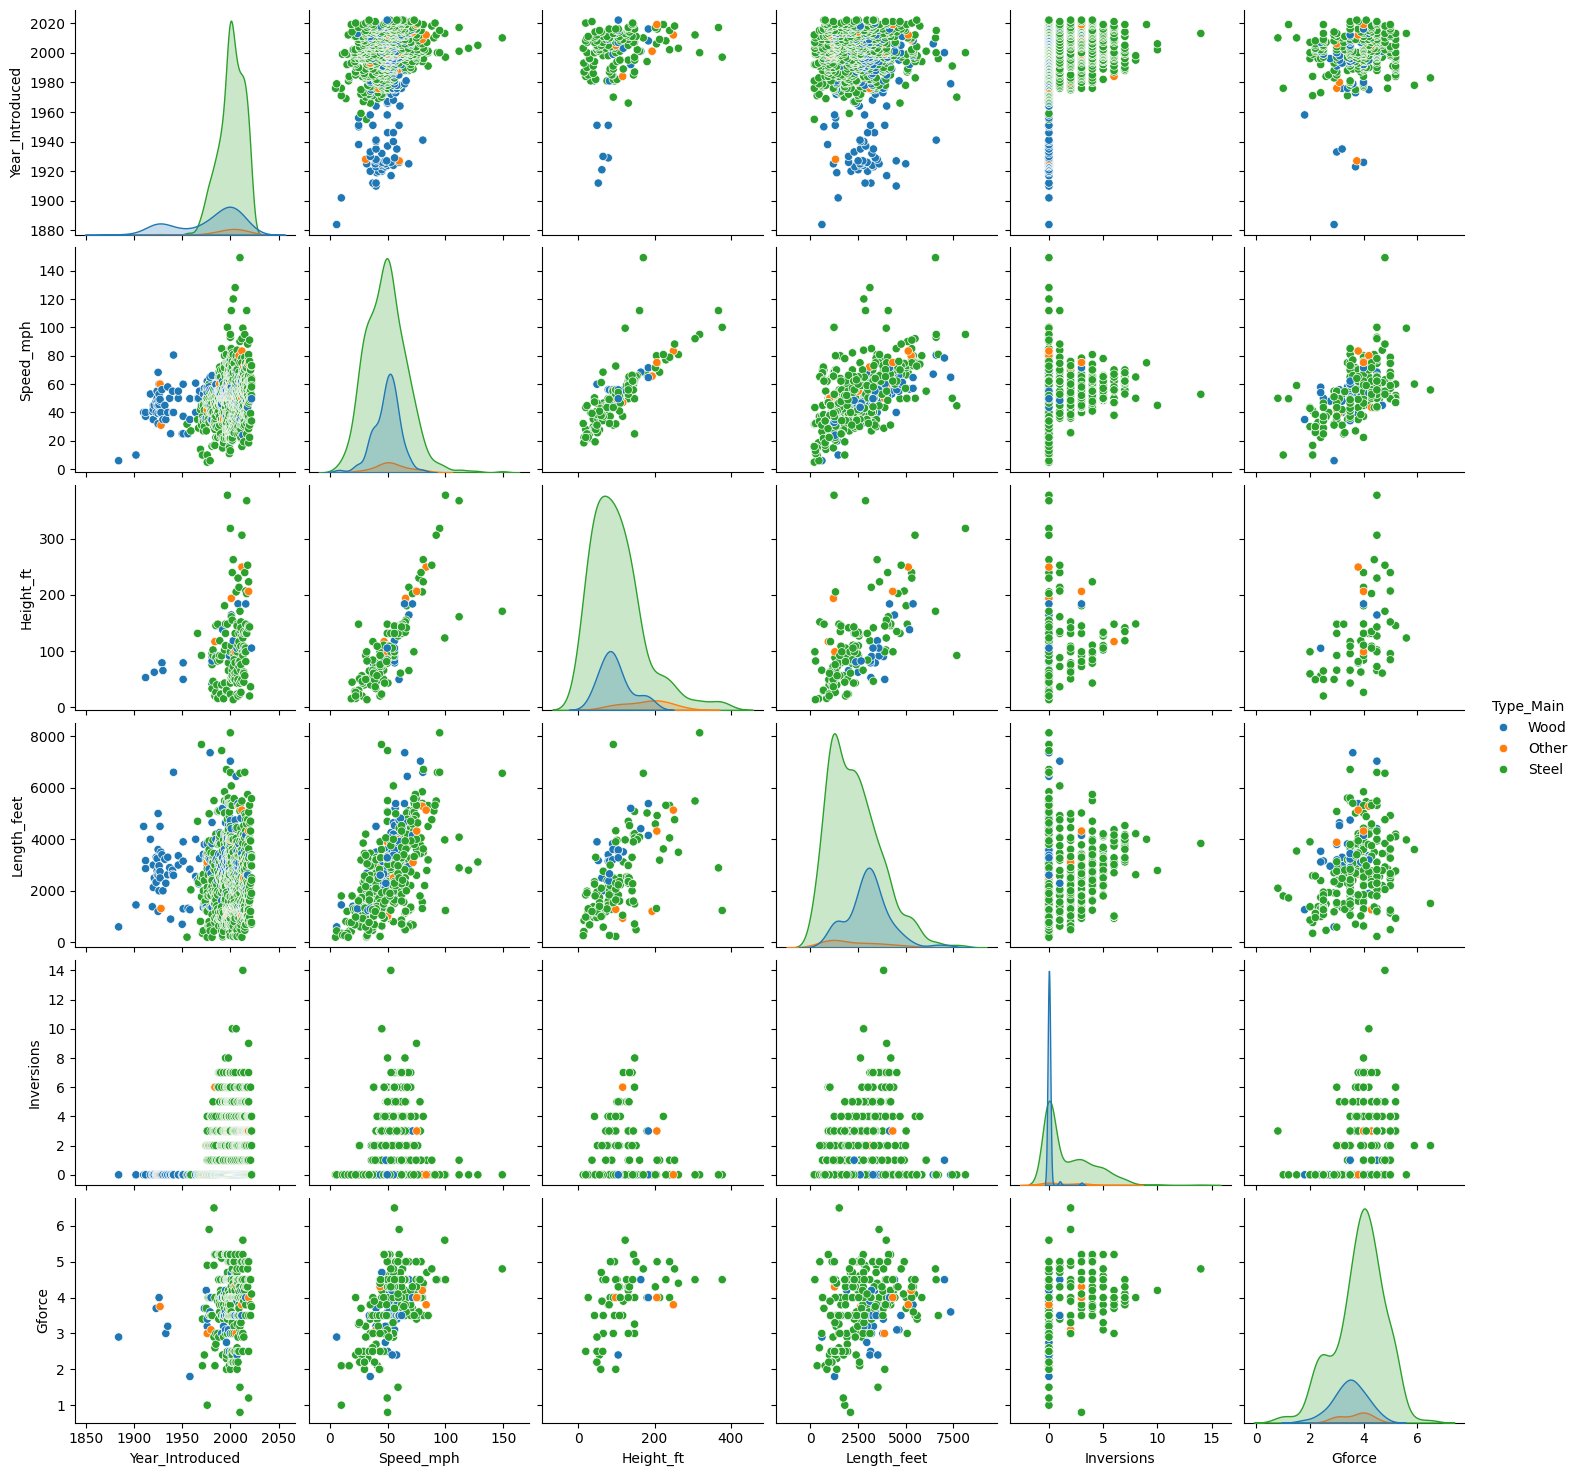

In [ ]:
sns.pairplot(df, vars=['Year_Introduced','Speed_mph',
    'Height_ft', 'Length_feet','Inversions','Gforce'], hue='Type_Main')




Text(0, 0.5, 'Speed (mph)')

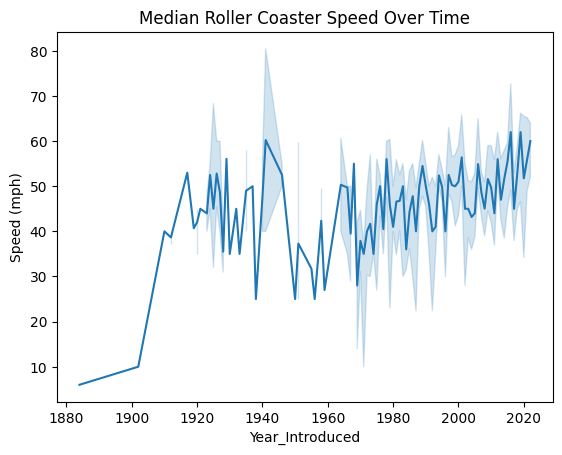

In [17]:

sns.lineplot(
    data=df,
    x='Year_Introduced',
    y='Speed_mph',
    estimator='median'
)
plt.title("Median Roller Coaster Speed Over Time")
plt.ylabel("Speed (mph)")
# Plot Shows that Newer Roller Coasters Tend to be Faster


Text(0, 0.5, 'Speed (mph)')

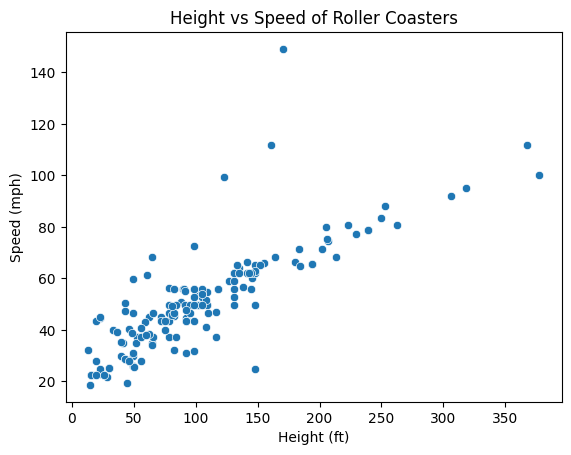

In [18]:
sns.scatterplot(
    data=df,
    x='Height_ft',
    y='Speed_mph'
)
plt.title("Height vs Speed of Roller Coasters")
plt.xlabel("Height (ft)")
plt.ylabel("Speed (mph)")

# Height and Speed are Positively Correlated which Implies that taller coasters tend to be faster

Text(0.5, 1.0, 'Speed Distribution by Manufacturer')

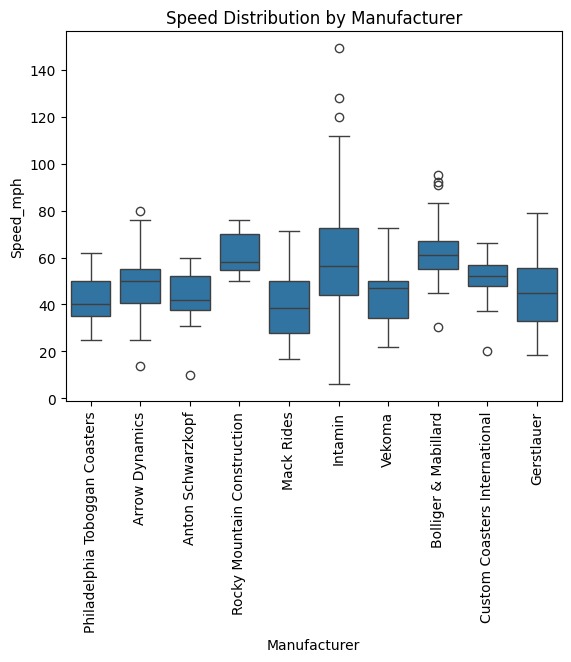

In [19]:
top_manu = df['Manufacturer'].value_counts().head(10).index

sns.boxplot(
    data=df[df['Manufacturer'].isin(top_manu)],
    x='Manufacturer',
    y='Speed_mph'
)
plt.xticks(rotation=90)
plt.title("Speed Distribution by Manufacturer")
# most manufacturers tend to produce coasters with speeds between 40 and 70 mph

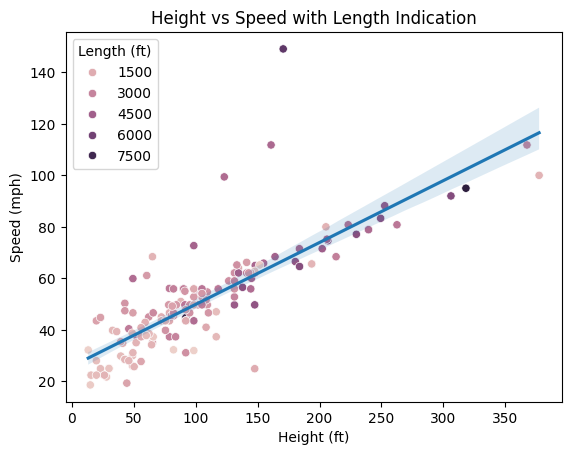

In [ ]:
sns.scatterplot(data=df, x='Height_ft', y='Speed_mph', hue='Length_feet')
sns.regplot(data=df, x='Height_ft', y='Speed_mph', scatter=False)
plt.title("Height vs Speed with Length Indication")
plt.xlabel("Height (ft)")
plt.ylabel("Speed (mph)")
plt.legend(title='Length (ft)')
plt.show()
# Taller coasters tend to be faster, and longer coasters (indicated by color) also tend to be faster

In [ ]:
# which manufacturer has the fastest coasters on average
df.groupby('Manufacturer')['Speed_mph']\
  .mean().sort_values(ascending=False).head(10)

Manufacturer
Giovanola                                85.000000
Lake Contrary Amusement Park             80.458328
S&S Arrow                                78.300000
D. H. Morgan Manufacturing               73.844444
S&S - Sansei Technologies                71.600000
Lagoon Corporation                       70.000000
Roller Coaster Corporation of America    64.033333
Rocky Mountain Construction              61.800000
Bolliger & Mabillard                     61.739216
Intamin                                  60.819627
Name: Speed_mph, dtype: float64

In [46]:
# which decade had the tallest coasters on average
df['Decade'] = (df['Year_Introduced'] // 10) * 10
df.groupby('Decade')['Height_ft']\
  .mean().sort_values(ascending=False).head(10)

Decade
1960    131.200000
2010    128.979167
2000    105.107692
1990     98.815000
1970     91.900000
2020     75.875000
1980     75.537500
1920     70.350000
1930     65.000000
1950     63.950000
Name: Height_ft, dtype: float64

In [51]:
# which locations have the most coasters
df['Location'].value_counts().sort_values(ascending=False).head(10)

Location
Other                        149
Cedar Point                   18
Kings Island                  18
Six Flags Magic Mountain      16
Hersheypark                   15
Carowinds                     13
Canada's Wonderland           13
Alton Towers                  13
Kings Dominion                12
Six Flags Great Adventure     12
Name: count, dtype: int64